# Finishing Touches

The output from ggplot is good, but not great. We need to add some pieces to it. The elements of a good graphic are:

* Headline
* Chatter
* The main body
* Annotations
* Labels
* Source line
* Credit line

That looks like:

![chart](chartannotated.png "A chart, annotated")

### Graphics vs visual stories

While the elements above are nearly required in every chart, they aren't when you are making visual stories. 

* When you have a visual story, things like credit lines can become a byline.
* In visual stories, source lines are often a note at the end of the story. 
* Graphics don’t always get headlines – sometimes just labels, letting the visual story headline carry the load.

[An example from The Upshot](https://www.nytimes.com/interactive/2018/02/14/business/economy/inflation-prices.html). Note how the charts don't have headlines, source or credit lines.

### Getting ggplot closer to output

Let's explore fixing up ggplot's output before we send it to a finishing program like Adobe Illustrator. We'll need a graphic to work with first. 


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date


Attaching package: ‘dplyr’

The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



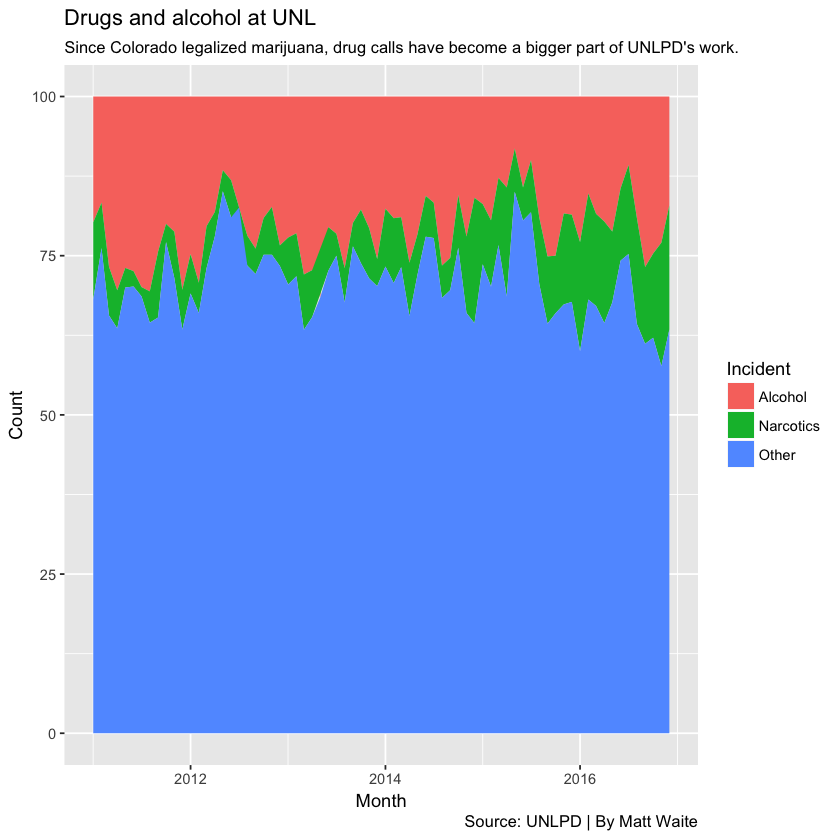

In [1]:
library(lubridate)
library(dplyr)
library(ggplot2)

unlcrime <- read.csv("../../Data/unlcrime.csv", na.string = "NA")

crimesbymonth <- unlcrime %>% mutate(
    shortdate = format(as.POSIXct(Reported, format="%Y-%m-%d")),
    month = floor_date(ymd(shortdate), "month"),
    category = ifelse(Incident.Code == "ALCOHOL - MINOR IN POSSESSION" | Incident.Code == "ALCOHOL - DRUNK" | Incident.Code == "ALCOHOL - DWI" | Incident.Code == "ALCOHOL - BUY/PROCURE FOR MINORS" | Incident.Code == "ALCOHOL - CONSUMPTION IN PUBLIC", "Alcohol",       
               ifelse(Incident.Code == "NARCOTICS - POSSESSION" | Incident.Code == "NARCOTICS - OTHER" | Incident.Code == "NARCOTICS - SALE/DELIVER", "Narcotics", "Other"))
) %>% group_by(category, month) %>% summarize(
    count = n()
    )

crimescount <- unlcrime %>% mutate(
    shortdate = format(as.POSIXct(Reported, format="%Y-%m-%d")),
    month = floor_date(ymd(shortdate), "month"),
) %>% group_by(month) %>% summarize(
    count = n()
    )

percents <- crimesbymonth %>% 
    inner_join(crimescount, by="month") %>%
    mutate(percentage = (count.x/count.y)*100)

ggplot(percents, aes(x=month, y=percentage, fill=category)) +
   geom_area() + scale_fill_discrete(name="Incident") +
   labs(x="Month", y="Count", title="Drugs and alcohol at UNL", subtitle="Since Colorado legalized marijuana, drug calls have become a bigger part of UNLPD's work.", caption="Source: UNLPD | By Matt Waite")

Let's take changing things one by one. The first thing we can do is change the default output size. Sometimes you don't want a square. We can use the `repr` library to do this easily in our notebooks. Using repr, we can specify the plot dimensions to whatever we want. Let's create a more rectangular version of this. 

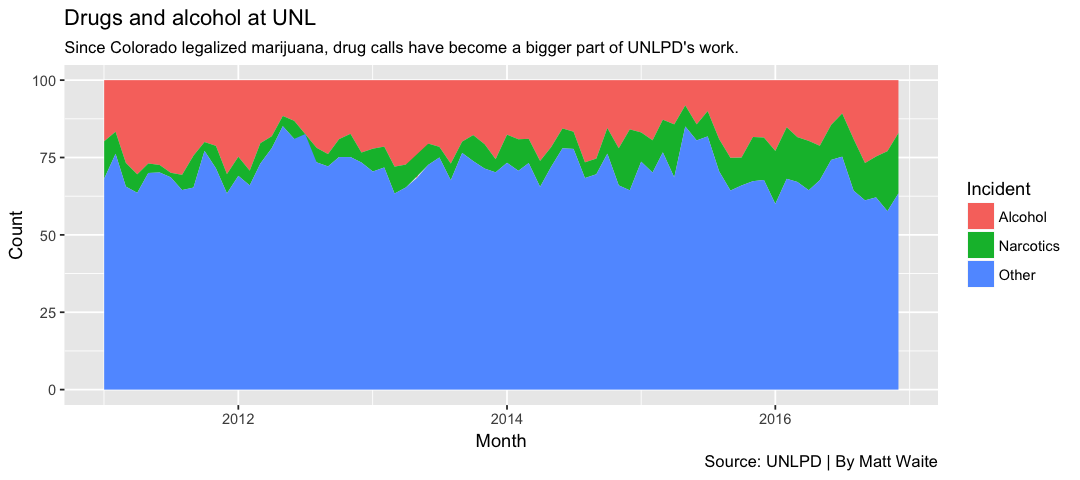

In [2]:
library(repr)
options(repr.plot.width=9, repr.plot.height=4)

ggplot(percents, aes(x=month, y=percentage, fill=category)) +
   geom_area() + scale_fill_discrete(name="Incident") +
   labs(x="Month", y="Count", title="Drugs and alcohol at UNL", subtitle="Since Colorado legalized marijuana, drug calls have become a bigger part of UNLPD's work.", caption="Source: UNLPD | By Matt Waite")

Off to a good start, but our text has no real heirarchy. We'd want our headline to stand out more. So let's change that. When it comes to changing text, the place to do that is in the theme element. [There are a lot of ways to modify the theme](http://ggplot2.tidyverse.org/reference/theme.html). We'll start easy. Let's make the headline bigger and bold.

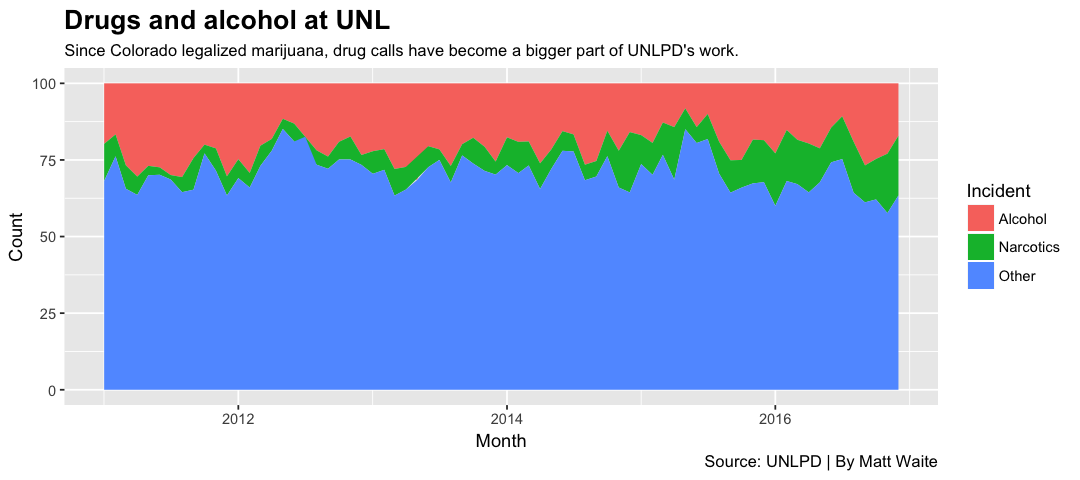

In [3]:
ggplot(percents, aes(x=month, y=percentage, fill=category)) +
   geom_area() + scale_fill_discrete(name="Incident") +
   labs(x="Month", y="Count", title="Drugs and alcohol at UNL", subtitle="Since Colorado legalized marijuana, drug calls have become a bigger part of UNLPD's work.", caption="Source: UNLPD | By Matt Waite") +
   theme(plot.title = element_text(size = 16, face = "bold"))

Better. But those axis titles are a bit large. Let's shrink them. 

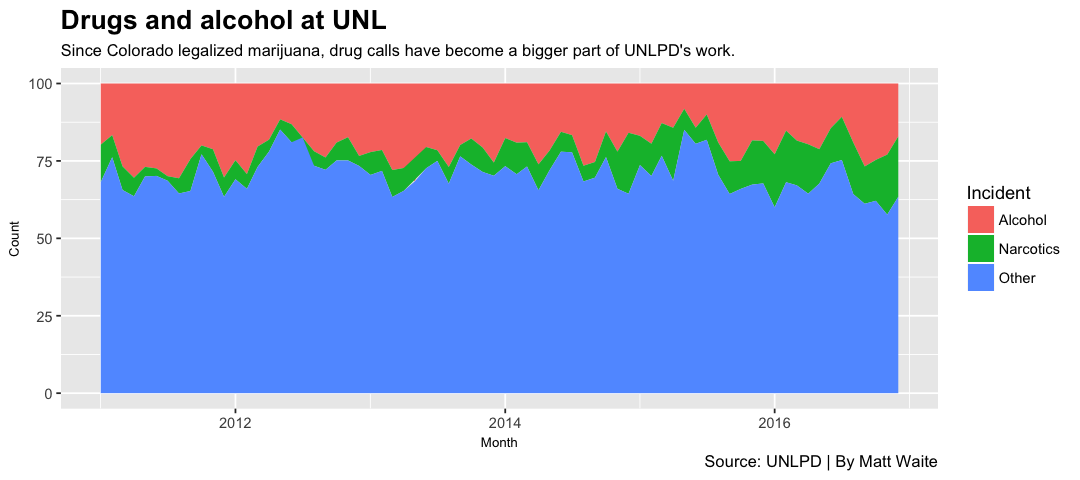

In [4]:
ggplot(percents, aes(x=month, y=percentage, fill=category)) +
   geom_area() + scale_fill_discrete(name="Incident") +
   labs(x="Month", y="Count", title="Drugs and alcohol at UNL", subtitle="Since Colorado legalized marijuana, drug calls have become a bigger part of UNLPD's work.", caption="Source: UNLPD | By Matt Waite") +
   theme(plot.title = element_text(size = 16, face = "bold"), axis.title = element_text(size = 8))

The problem with the concept of this graphic is that it mentions Colorado marijuana legalization but doesn't show you where that happened. How can we annotate our graph? Believe it or not, there is something called an [annotation layer](http://ggplot2.tidyverse.org/reference/annotate.html) and there are also [reference lines](http://ggplot2.tidyverse.org/reference/geom_abline.html). You can change the size and the [color](http://sape.inf.usi.ch/quick-reference/ggplot2/colour) as well.

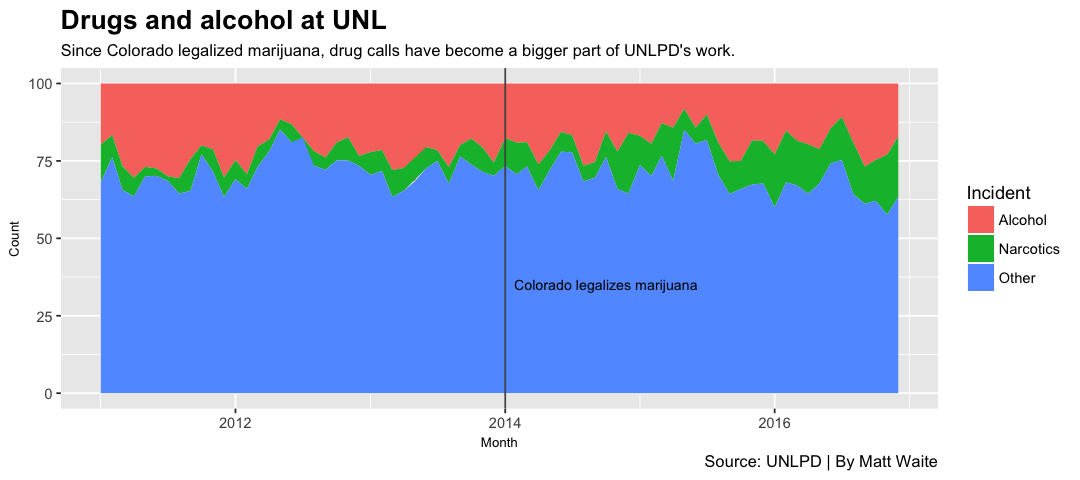

In [9]:
ggplot(percents, aes(x=month, y=percentage, fill=category)) +
   geom_area() + scale_fill_discrete(name="Incident") +
   labs(x="Month", y="Count", title="Drugs and alcohol at UNL", subtitle="Since Colorado legalized marijuana, drug calls have become a bigger part of UNLPD's work.", caption="Source: UNLPD | By Matt Waite") +
   theme(plot.title = element_text(size = 16, face = "bold"), axis.title = element_text(size = 8)) +
   geom_vline(xintercept=as.numeric(as.Date("2014-01-01")), color="grey32", size=.5) +
   annotate("text", x=as.Date("2014-10-01"), y=35, label="Colorado legalizes marijuana", size=3)
   

We can also remove things by setting their theme element to blank. For instance, if we wanted to get rid of the axis ticks -- those little lines next to the numbers, we would alter the theme to set `axis.ticks=element_blank()`

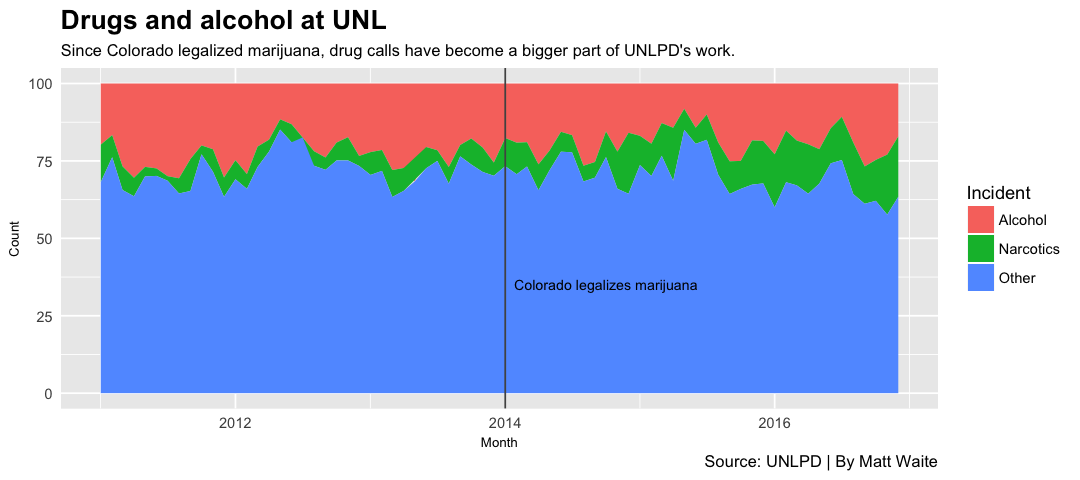

In [6]:
ggplot(percents, aes(x=month, y=percentage, fill=category)) +
   geom_area() + scale_fill_discrete(name="Incident") +
   labs(x="Month", y="Count", title="Drugs and alcohol at UNL", subtitle="Since Colorado legalized marijuana, drug calls have become a bigger part of UNLPD's work.", caption="Source: UNLPD | By Matt Waite") +
   theme(plot.title = element_text(size = 16, face = "bold"), axis.title = element_text(size = 8), axis.ticks=element_blank()) +
   geom_vline(xintercept=as.numeric(as.Date("2014-01-01")), color="grey32", size=.5) +
   annotate("text", x=as.Date("2014-10-01"), y=35, label="Colorado legalizes marijuana", size=3)
   

Now, let's get this into Illustrator. We do that with `ggsave` and add a width and a height. 

In [7]:
ggsave("unlpd.pdf", width=9, height=4)

## Assignment

Take the [scatterplot from assignment 10](https://github.com/mattwaite/JOUR491-Data-Visualization/blob/master/Assignments/10_Scatterplots/Scatterplots.ipynb), which was never actually assigned to you and clean it up for publication. Add the necessary parts to it -- as shown above -- and use Illustrator or other vector editing software to improve the labelling and overall look of the graphic. The [data for the scatterplot](https://www.dropbox.com/s/4w7nu9f47n1ef2f/movies.csv?dl=0) is in the class respository. A neat example of how you can use ggplot to mimic the work of a graphic artist: [Recreate Economist graph by ggplot2](http://databeauty.com/blog/tutorial/2017/03/03/recreate-economist-graph-by-ggplot2.html)

### Rubric

1. Did you add the necessary elements to make a complete graphic?
2. Did you use repr to change the size? Did you use theme to change fonts, weights, colors, etc.? Clean the output before sending it to Illustrator?
3. Did you improve the ggplot output visibly in Illustrator?